In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
nht_dead = np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])
nht_live = np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])

We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers. In this problem you will perform an A/B test to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) using the difference in mean inter-no-hitter time as your test statistic. The inter-no-hitter times for the respective eras are stored in the arrays <b>nht_dead</b> and <b>nht_live</b>, where "nht" is meant to stand for "no-hitter time."

In [19]:
def ecdf(data):
    '''creating data for cumulative distribution'''
    x = np.sort(data)
    y = np.arange(1, len(x) +1)/len(x)
    return x, y

def diff_of_means(data1, data2):
    '''generate difference of means'''
    return np.mean(data1)-np.mean(data2)

def permutation_samples(data1, data2):
    '''genrate permutation replicates'''
    data = np.concatenate((data1, data2))
    permute_sample = np.random.permutation(data)
    perm1 = permute_sample[:len(data1)]
    perm2 = permute_sample[len(data1):]
    return perm1, perm2

def draw_perm_reps(data1, data2, func, size = 1):
    '''generate permutation replicates'''
    perm_replicates = np.empty(size)
    for i in range(size):
        perm1, perm2 = permutation_samples(data1, data2)
        perm_replicates[i] = func(perm1, perm2)
        
    return perm_replicates

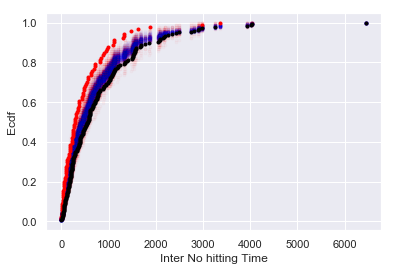

In [18]:
#plotting the ecdf to check that the null hypothesis that is the distribution are identical is not true
for _ in range(100):
    perm_sample1, perm_sample2 = permutation_samples(nht_dead, nht_live)
    
    x_1, y_1 = ecdf(perm_sample1)
    x_2, y_2 = ecdf(perm_sample2)
    
    _ = plt.plot(x_1, y_1, marker = '.', linestyle = 'none', color = 'red', alpha = 0.02)
    _ = plt.plot(x_2, y_2, marker = '.', linestyle = 'none', color = 'blue', alpha = 0.02)
    
#ecdf plot of original data
x_1, y_1 = ecdf(nht_dead)
x_2, y_2 = ecdf(nht_live)

_ = plt.plot(x_1, y_1, marker = '.', linestyle = 'none', color = 'red')
_ = plt.plot(x_2, y_2, marker = '.', linestyle = 'none', color = 'black')

_ = plt.xlabel('Inter No hitting Time')
_ = plt.ylabel('Ecdf')
plt.show()
    

As we can see the red and black line do not collide with permutation sample so we can say that they are not identically distributed

In [10]:
np.random.seed(42)
nht_diff_obs = diff_of_means(nht_dead, nht_live)
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, size = 10000)
p = np.sum(perm_replicates <= nht_diff_obs)/len(perm_replicates)
p

0.0001

our p-value is 0.0001, which means that only one out of your 10,000 replicates had a result as extreme as the actual difference between the dead ball and live ball eras. This suggests strong statistical significance. Watch out, though, you could very well have gotten zero replicates that were as extreme as the observed value. This just means that the p-value is quite small, almost certainly smaller than 0.001.